# Ujian Akhir Semester IBDA 4311
Jody N. Imanuel / 191900378

### Topik Pembahasan : 
Topik yang ingin diselesaikan dalam project ini adalah cara mendeteksi atau mengetahui ciri-ciri dari paru-paru yang mengalami COVID-19, Normal, dan Viral Pneumonia.

In [2]:
# Melakukan instalasi library yang dibutuhkan untuk membuat model.
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import torch
import torchvision
import torchvision.models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import time
import torch.optim as optim

In [3]:
# Menentukan letak gambar test dataset paru-paru 
base_dir_test = '//kaggle/input/covid19-image-dataset/Covid19-dataset/test'

test_normal_dir = os.path.join(base_dir_test, 'Normal')
test_covid_dir = os.path.join(base_dir_test, 'Covid')
test_viral_pneumonia_dir = os.path.join(base_dir_test, 'Viral Pneumonia')

# Mendapatkan total gambar tes yang dikelompokkan berdasarkan normal, covid, dan pneumonia
print('total training Normal images:', len("test/Covid"))
print('total training Covid images:', len("test/Normal"))
print('total training Viral Pneumonia images:', len("test/Viral Pneumonia"))

print("-"*20)
# Memanggil masing-masing file gambar test yang terdiri dari gambar paru-paru normal, covid, dan pneumonia
Normal_files = "Normal"
print(Normal_files[:11])

Covid_files = "Covid"
print(Covid_files[:10])

Viral_Pneumonia_files = "Pneumonia"
print(Viral_Pneumonia_files[:10])

total training Normal images: 10
total training Covid images: 11
total training Viral Pneumonia images: 20
--------------------
Normal
Covid
Pneumonia


In [4]:
# Menentukan letak gambar train dataset paru-paru
base_dir_train = '//kaggle/input/covid19-image-dataset/Covid19-dataset/train'

train_normal_dir = os.path.join(base_dir_train, 'Normal')
train_covid_dir = os.path.join(base_dir_train, 'Covid')
train_viral_pneumonia_dir = os.path.join(base_dir_train, 'Viral Pneumonia')

# Mendapatkan total gambar train (latih) yang dikelompokkan berdasarkan normal, covid, dan pneumonia
print('total training Normal images:', len("train/Covid"))
print('total training Covid images:', len("train/Normal"))
print('total training Viral Pneumonia images:', len("train/Viral Pneumonia"))

print("-"*20)
# Memanggil masing-masing file gambar train yang terdiri dari gambar paru-paru normal, covid, dan pneumonia
Normal_files = "Normal"
print(Normal_files[:10])

Covid_files = "Covid"
print(Covid_files[:10])

Viral_Pneumonia_files = "Pneumonia"
print(Viral_Pneumonia_files[:10])

total training Normal images: 11
total training Covid images: 12
total training Viral Pneumonia images: 21
--------------------
Normal
Covid
Pneumonia


In [5]:
# Melakukan transformer data
transformer = transforms.Compose([
    transforms.Resize((200,200)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16
train_loader = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(base_dir_train, transform=transformer), batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(base_dir_test, transform=transformer), batch_size=batch_size, shuffle=False, num_workers=2)

classes = ("Covid", "Normal", "Viral Pneumonia")
classes

('Covid', 'Normal', 'Viral Pneumonia')

torch.Size([16, 3, 200, 200])
tensor([[[[-1.0000, -1.0000, -0.9451,  ..., -0.9529, -0.9529, -0.9686],
          [-1.0000, -1.0000, -0.9451,  ..., -0.9529, -0.9529, -0.9686],
          [-1.0000, -1.0000, -0.9451,  ..., -0.9529, -0.9529, -0.9686],
          ...,
          [-0.7255, -0.6627, -0.7333,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7098, -0.6706, -0.7333,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7176, -0.6863, -0.7412,  ..., -0.9922, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -0.9451,  ..., -0.9529, -0.9529, -0.9686],
          [-1.0000, -1.0000, -0.9451,  ..., -0.9529, -0.9529, -0.9686],
          [-1.0000, -1.0000, -0.9451,  ..., -0.9529, -0.9529, -0.9686],
          ...,
          [-0.7255, -0.6627, -0.7333,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7098, -0.6706, -0.7333,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7176, -0.6863, -0.7412,  ..., -0.9922, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -0.9451,  ..., -0.9529, -0.9529, -0.9686],


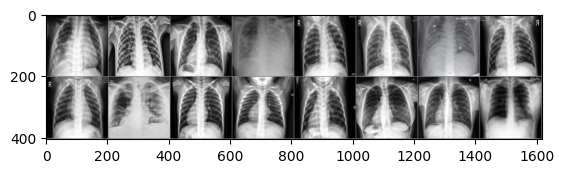

Viral Pneumonia | Viral Pneumonia | Normal | Covid | Viral Pneumonia | Viral Pneumonia | Covid | Viral Pneumonia | Viral Pneumonia | Covid | Normal | Normal | Viral Pneumonia | Covid | Normal | Covid


In [6]:
# Menampilkan ukuran torch dan tensor dari masing-masing dataset gambar paru-paru
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Membuat iterasi data berdasarkan data train_loader
for images, labels in train_loader:
    print(images.shape)
    print(images)

    imshow(torchvision.utils.make_grid(images))

    print(' | '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))
    break

In [7]:
conv = torch.nn.Conv2d(in_channels=3, out_channels=7, kernel_size=7, padding=2)  

print(images.shape)
y = conv(images)         
print(y.shape)
y = y.detach().numpy() 

y_max = np.max(y)
y_min = np.min(y)
img_after_conv = y - y_min / (y_max - y_min)
img_after_conv.shape

torch.Size([16, 3, 200, 200])
torch.Size([16, 7, 198, 198])


(16, 7, 198, 198)

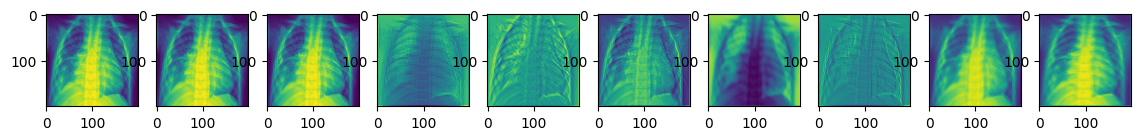

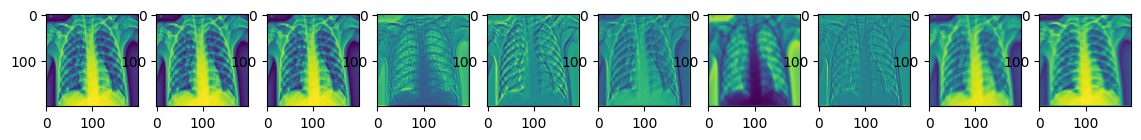

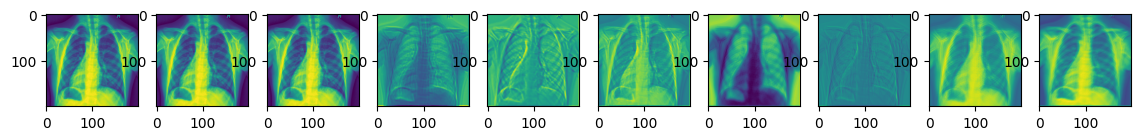

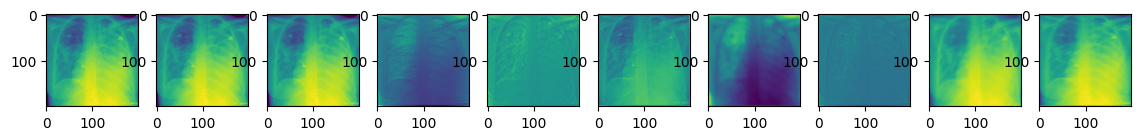

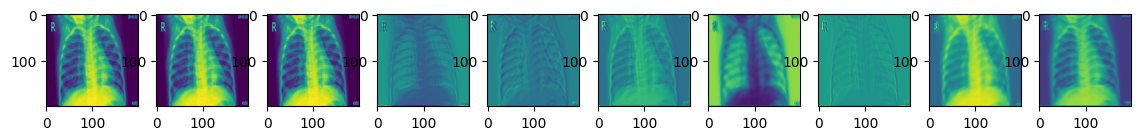

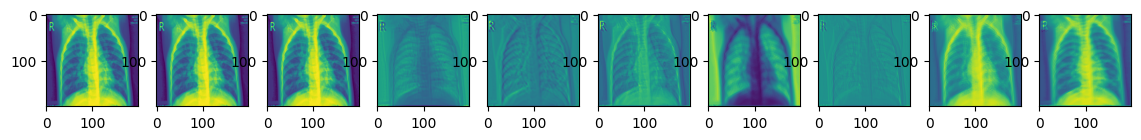

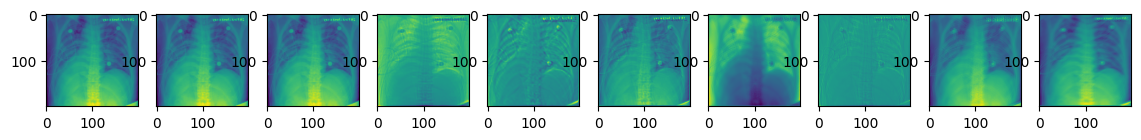

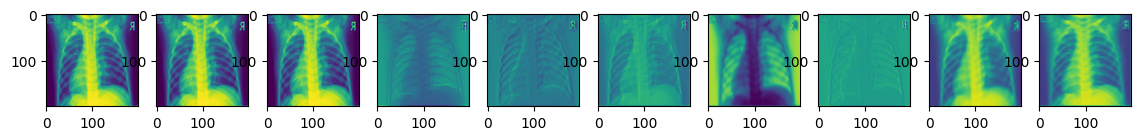

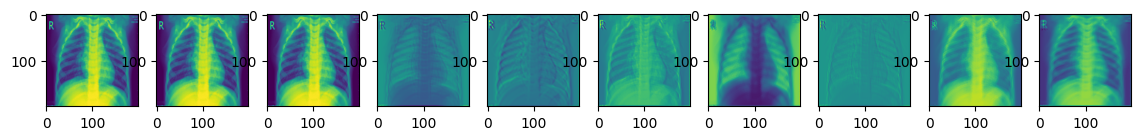

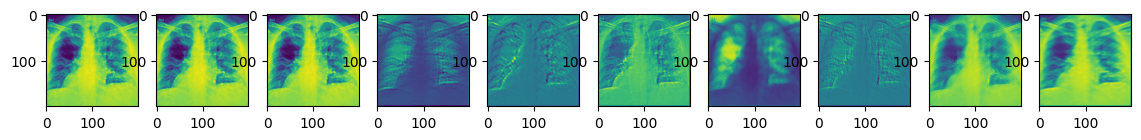

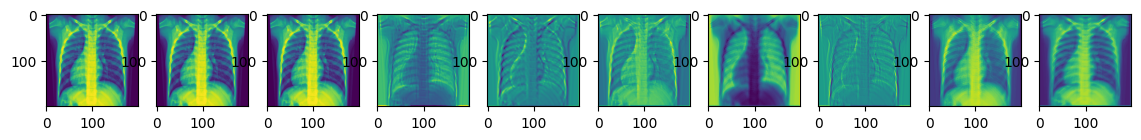

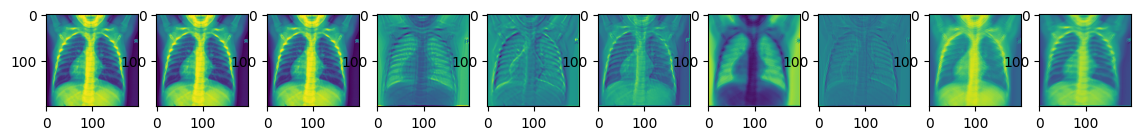

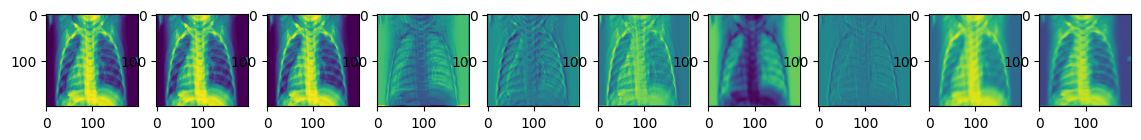

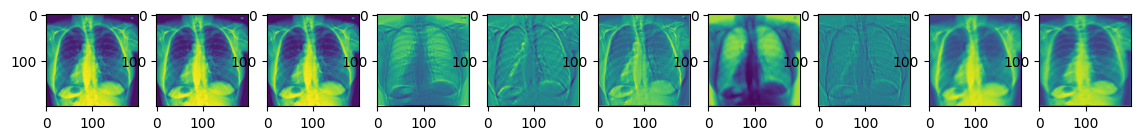

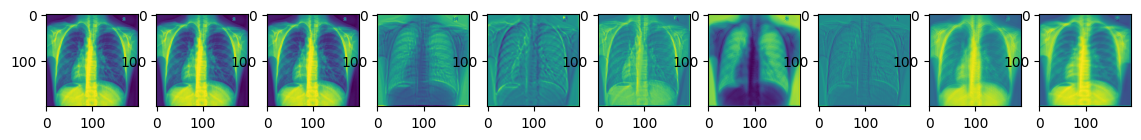

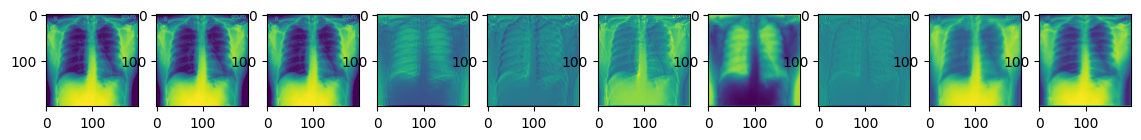

In [8]:
# Menampilkan gambar dataset paru-paru menggunakan fitur RGB.
for b in range(batch_size):
    plt.figure(figsize=(14,4))
    for i in range(3):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[b][i])
    for i in range(7):
        plt.subplot(1, 10, i+4)
        plt.imshow(img_after_conv[b][i])
    plt.show()
    plt.close()

In [9]:
def show_images(images, labels):
    plt.figure(figsize=(12, 8))
    for i, img in enumerate(images):
        plt.subplot(1, 6, i + 1, xticks=[], yticks=[])
        img = img.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = img * std + mean
        img = np.clip(img, 0., 1.)
        plt.imshow(img)
        plt.xlabel(f'{classes[int(labels[i].numpy())]}')
        if(i==5):
          break
    plt.tight_layout()
    plt.show()

### Menampilkan Gambar Data Train dan Test

torch.Size([16, 3, 200, 200])


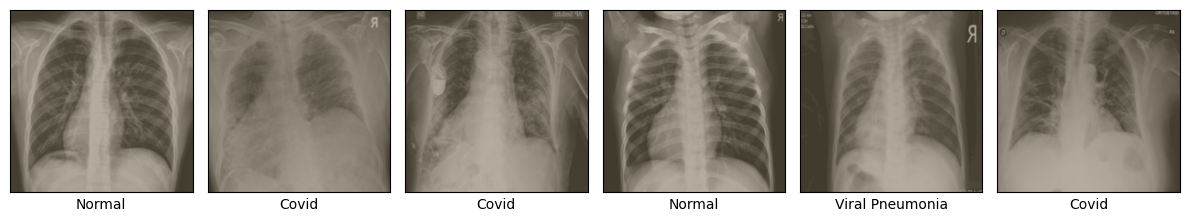

In [10]:
images, labels = next(iter(train_loader))
print(images.shape)
show_images(images, labels) 

torch.Size([16, 3, 200, 200])


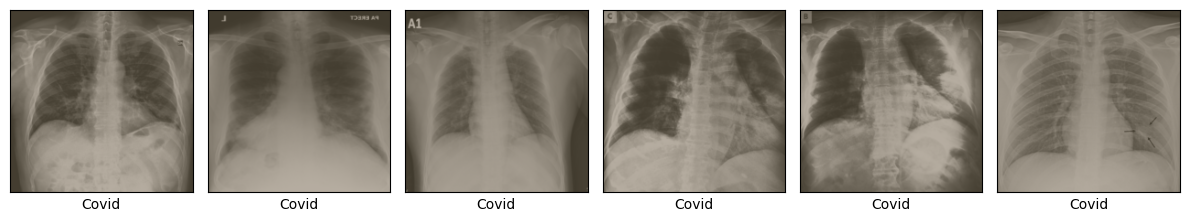

In [11]:
images, labels = next(iter(test_loader))
print(images.shape)
show_images(images, labels)

## Membuat Model AlexNet

In [12]:
# Menentukan letak gambar train dataset paru-paru
base_dir_train = '//kaggle/input/covid19-image-dataset/Covid19-dataset/train'

train_normal_dir = os.path.join(base_dir_train, 'Normal')
train_covid_dir = os.path.join(base_dir_train, 'Covid')
train_viral_pneumonia_dir = os.path.join(base_dir_train, 'Viral Pneumonia')

# Mendapatkan total gambar train (latih) yang dikelompokkan berdasarkan normal, covid, dan pneumonia
print('total training Normal images:', len("train/Covid"))
print('total training Covid images:', len("train/Normal"))
print('total training Viral Pneumonia images:', len("train/Viral Pneumonia"))

print("-"*20)
# Menentukan letak gambar test dataset paru-paru 
base_dir_test = '//kaggle/input/covid19-image-dataset/Covid19-dataset/test'

test_normal_dir = os.path.join(base_dir_test, 'Normal')
test_covid_dir = os.path.join(base_dir_test, 'Covid')
test_viral_pneumonia_dir = os.path.join(base_dir_test, 'Viral Pneumonia')

# Mendapatkan total gambar tes yang dikelompokkan berdasarkan normal, covid, dan pneumonia
print('total training Normal images:', len("test/Covid"))
print('total training Covid images:', len("test/Normal"))
print('total training Viral Pneumonia images:', len("test/Viral Pneumonia"))

total training Normal images: 11
total training Covid images: 12
total training Viral Pneumonia images: 21
--------------------
total training Normal images: 10
total training Covid images: 11
total training Viral Pneumonia images: 20


In [13]:
transform_train = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

train_set = torchvision.datasets.ImageFolder(base_dir_train, transform=transform_train)
test_set = torchvision.datasets.ImageFolder(base_dir_test, transform=transform_test)

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

classes = train_set.classes
classes

['Covid', 'Normal', 'Viral Pneumonia']

In [39]:
local_alexnet_weights_path = '//kaggle/input/alexnet/alexnet.pth'
alexNet = torchvision.models.alexnet()
loss_fn = torch.nn.CrossEntropyLoss()
alexNet.load_state_dict(torch.load(local_alexnet_weights_path))
alexNet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Visualisasi 

[1] loss: 7.078760266304016
[2] loss: 5.58698034286499
[3] loss: 4.149037718772888
[4] loss: 2.8406569957733154
[5] loss: 1.0249750167131424
[6] loss: 0.6764089912176132
[7] loss: 0.6039519235491753
[8] loss: 0.324686449021101
[9] loss: 0.21727463975548744
[10] loss: 0.37034526467323303
[11] loss: 0.434527650475502
[12] loss: 0.2632197793573141
[13] loss: 0.14285632967948914
[14] loss: 0.11389180459082127
[15] loss: 0.10186302661895752
[16] loss: 0.08730677049607038
[17] loss: 0.08437389321625233
[18] loss: 0.1064011249691248
[19] loss: 0.2438838928937912
[20] loss: 0.1316878478974104
Finished Training, time: 408.074442
408.0745952129364


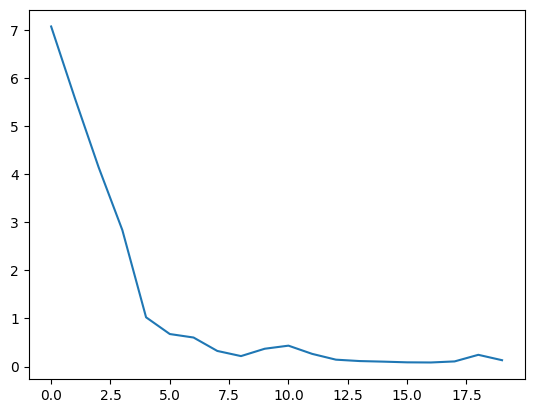

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
alexnet = alexNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.005)

start = time.time()

Loss = []
for epoch in range(20): 

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()
        
        outputs = alexnet(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)

In [71]:
correct = 0
total = 0
alexnet.to('cpu')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = alexnet(images)
        _, predictions = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

print(f'akurasi pada seluruh data tes: {100 * correct // total} %')

# print accuracy untuk setiap class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Akurasi pada label : {classname:5s} adalah {accuracy:.1f} %')

akurasi pada seluruh data tes: 98 %
Akurasi pada label : Covid adalah 100.0 %
Akurasi pada label : Normal adalah 95.0 %
Akurasi pada label : Viral Pneumonia adalah 100.0 %


In [45]:
def evaluate_model(model, dataloader):
    model.eval()
    loss_sum = 0.
    correct_preds = 0

    with torch.no_grad():
        for step, (images, labels) in enumerate(dataloader):
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss_sum += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()

    avg_loss = loss_sum / (step + 1)
    accuracy = correct_preds / len(dataloader.dataset)

    model.train()

    return avg_loss, accuracy

In [63]:
def show_preds():
    alexnet.eval()
    images, labels = next(iter(test_loader))
    outputs  = alexnet(images)
    _, preds = torch.max(outputs, 1)
    show_images(images, labels)

In [69]:
def train(epochs,early_stopping_accuracy=0.98):
    for e in range(epochs):

        train_loss = 0.

        alexnet.train()

        for train_step, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = alexnet(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            if train_step % 20 == 0:
                avg_loss, accuracy = evaluate_model(alexnet, test_loader)

                print(f'Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

                show_preds()

        train_loss /= (train_step + 1)
        print(f'Training Loss: {train_loss:.4f}')

### Final Results

Validation Loss: 0.1681, Accuracy: 0.9848


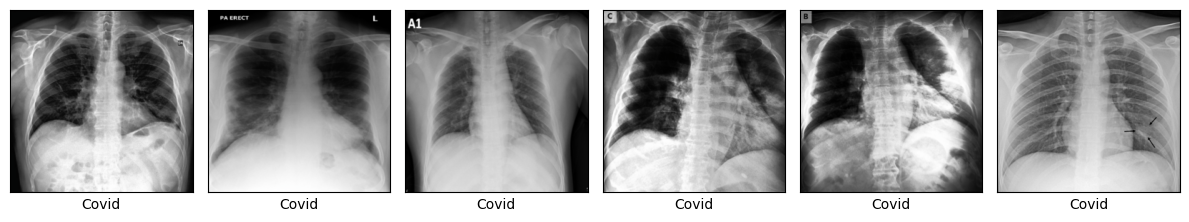

Training Loss: 0.0438
CPU times: user 36.8 s, sys: 4.6 s, total: 41.4 s
Wall time: 28.1 s


In [70]:
%%time

train(epochs=1)